# Data for MD simulation of polymer folding

In [232]:
import numpy as np
from polymer import *
import matplotlib.pyplot as plt
from ase import Atoms
from ase.io import write

#Simulation parameters
k = 1.0  # Spring constant
epsilon_repulsive = 1.0  # Depth of repulsive LJ potential
n_particles = 20  # Number of particles
box_size = 100  # Size of the cubic box
r0 = 1.0  # Equilibrium bond length
mass = 1.0  # Particle mass
sigma = 1.0  # LJ potential parameter
dt = 0.01  # Time step
total_steps = 10000  # Number of steps
rescale_interval = 100  # Steps between velocity rescaling


In [233]:
# Arrays to store properties
temperatures = np.linspace(0.1, 1, 10)

e_repuls = np.linspace(1.0, 2, 10)
k_lst = np.linspace(1, 2, 10)

Rg_values = []
Ree_values = []
potential_energies = []
pe_harm = []
pe_attract = []
pe_repulse = []
temp_positions = []


for T in temperatures:
    # Set target temperature
    target_temperature = T
    
    # Initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    print(positions)
    velocities = initialize_velocities(n_particles, target_temperature, mass)
    trjs = []
    # Simulation loop
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass, k)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, target_temperature, mass)
        if not (step + 1) % 20:
            trjs.append(Atoms(f"H{20}", positions=positions, velocities=velocities, cell=[box_size, box_size, box_size]))
    
    write(f"{T}.extxyz", trjs, format="extxyz")
    pe_harmonic = calc_harmonic_potential_energy(positions, k)
    pe_attractive = calc_LJ_potential_energy(positions, "attractive")
    pe_repulsive = calc_LJ_potential_energy(positions, "repulsive")
    Rg = calc_gyration_radius(positions)
    Ree = calc_end_to_end_dist(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    pe_harm.append(pe_harmonic)
    pe_attract.append(pe_attractive)
    pe_repulse.append(pe_repulsive)
    temp_positions.append(positions)
    potential_energies.append(pe_harmonic + pe_attractive + pe_repulsive)


[[50.84919575 50.46152944 50.2566265 ]
 [51.41392307 51.25231526 50.49272146]
 [51.71294315 51.72780121 51.32006668]
 [52.23682701 52.49778253 51.68431175]
 [52.8177923  53.12234624 52.20623082]
 [53.80649977 53.24038474 52.29855876]
 [54.39590897 53.75578411 52.92062007]
 [55.34288473 54.04404533 53.06254389]
 [55.54060709 54.66620077 53.82005856]
 [56.18627459 55.33928919 54.18070446]
 [56.90132966 55.96965877 54.48291371]
 [57.82161303 56.30410544 54.68595052]
 [58.26311761 56.96914408 55.2882771 ]
 [59.06509816 57.51909305 55.52147941]
 [59.69545766 57.69957342 56.27651169]
 [60.35798234 57.75435174 57.02354609]
 [60.83716409 58.19694207 57.78150298]
 [61.52209739 58.5159344  58.43656806]
 [62.4986481  58.62849854 58.62008383]
 [63.20332118 59.09116762 59.158018  ]]
[[50.23327468 50.44473086 50.86475279]
 [50.66018086 51.13460247 51.44941361]
 [50.97657609 51.67687869 52.22776479]
 [51.58865285 52.39933132 52.54936118]
 [52.32886977 53.04007405 52.75314452]
 [53.19827965 53.4635514

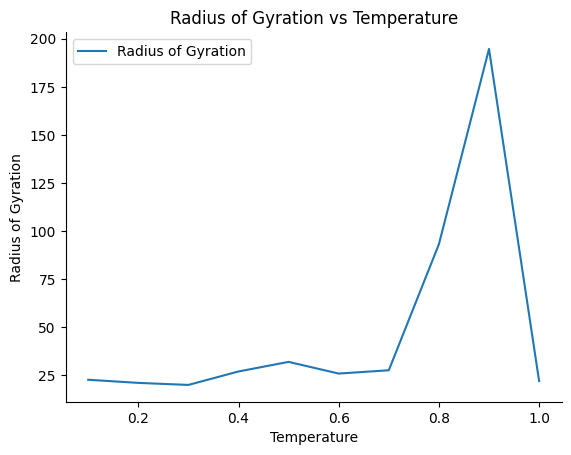

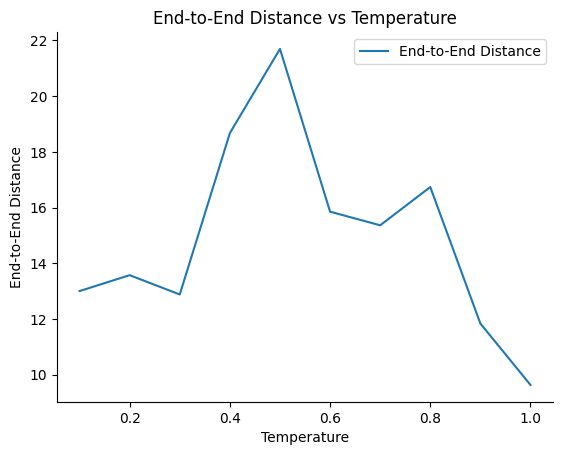

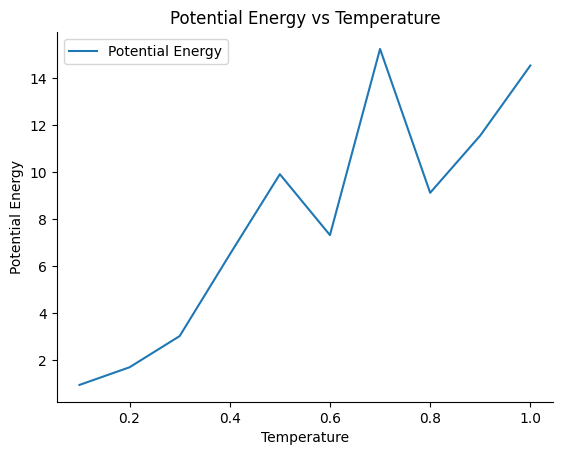

In [234]:
# Plotting
plt.figure()
plt.plot(temperatures, Rg_values, label='Radius of Gyration')
plt.xlabel('Temperature')
plt.ylabel('Radius of Gyration')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title('Radius of Gyration vs Temperature')
plt.legend()
plt.show()

plt.figure()
plt.plot(temperatures, Ree_values, label='End-to-End Distance')
plt.xlabel('Temperature')
plt.ylabel('End-to-End Distance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.67, linestyle="--", color='black', label="T = 0.67")
plt.title('End-to-End Distance vs Temperature')
plt.legend()
plt.show()

plt.figure()
plt.plot(temperatures, potential_energies, label='Potential Energy')
plt.xlabel('Temperature')
plt.ylabel('Potential Energy')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
plt.title('Potential Energy vs Temperature')
plt.legend()
plt.show()

# plt.figure()
# plt.plot(temperatures, pe_harm, label='Harmonic')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Harmonic vs Temperature')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(temperatures, pe_attract, label='Attractive')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Attractive vs Temperature')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(temperatures, pe_repulse, label='Repulsive')
# plt.xlabel('Temperature')
# plt.ylabel('Potential Energy')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# # plt.axvline(0.6, linestyle="--", color='black', label="T = 0.6")
# plt.title('Repulsive vs Temperature')
# plt.legend()
# plt.show()